In [9]:
import numpy as np

data=np.load('data_face.npy')
target=np.load('target_face.npy')

In [10]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [11]:
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224,224,3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name='flatten')(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_3[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

 rmalization)                                                                                     
                                                                                                  
 block_3_expand_relu (ReLU)  (None, 56, 56, 144)          0         ['block_3_expand_BN[0][0]']   
                                                                                                  
 block_3_pad (ZeroPadding2D  (None, 57, 57, 144)          0         ['block_3_expand_relu[0][0]'] 
 )                                                                                                
                                                                                                  
 block_3_depthwise (Depthwi  (None, 28, 28, 144)          1296      ['block_3_pad[0][0]']         
 seConv2D)                                                                                        
                                                                                                  
 block_3_d

 seConv2D)                                                                                        
                                                                                                  
 block_6_depthwise_BN (Batc  (None, 14, 14, 192)          768       ['block_6_depthwise[0][0]']   
 hNormalization)                                                                                  
                                                                                                  
 block_6_depthwise_relu (Re  (None, 14, 14, 192)          0         ['block_6_depthwise_BN[0][0]']
 LU)                                                                                              
                                                                                                  
 block_6_project (Conv2D)    (None, 14, 14, 64)           12288     ['block_6_depthwise_relu[0][0]
                                                                    ']                            
          

 block_9_project_BN (BatchN  (None, 14, 14, 64)           256       ['block_9_project[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_9_add (Add)           (None, 14, 14, 64)           0         ['block_8_add[0][0]',         
                                                                     'block_9_project_BN[0][0]']  
                                                                                                  
 block_10_expand (Conv2D)    (None, 14, 14, 384)          24576     ['block_9_add[0][0]']         
                                                                                                  
 block_10_expand_BN (BatchN  (None, 14, 14, 384)          1536      ['block_10_expand[0][0]']     
 ormalization)                                                                                    
          

 block_13_expand_BN (BatchN  (None, 14, 14, 576)          2304      ['block_13_expand[0][0]']     
 ormalization)                                                                                    
                                                                                                  
 block_13_expand_relu (ReLU  (None, 14, 14, 576)          0         ['block_13_expand_BN[0][0]']  
 )                                                                                                
                                                                                                  
 block_13_pad (ZeroPadding2  (None, 15, 15, 576)          0         ['block_13_expand_relu[0][0]']
 D)                                                                                               
                                                                                                  
 block_13_depthwise (Depthw  (None, 7, 7, 576)            5184      ['block_13_pad[0][0]']        
 iseConv2D

                                                                                                  
 block_16_depthwise (Depthw  (None, 7, 7, 960)            8640      ['block_16_expand_relu[0][0]']
 iseConv2D)                                                                                       
                                                                                                  
 block_16_depthwise_BN (Bat  (None, 7, 7, 960)            3840      ['block_16_depthwise[0][0]']  
 chNormalization)                                                                                 
                                                                                                  
 block_16_depthwise_relu (R  (None, 7, 7, 960)            0         ['block_16_depthwise_BN[0][0]'
 eLU)                                                               ]                             
                                                                                                  
 block_16_

In [12]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [14]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=12)

Epoch 1/12


2023-09-18 14:17:16.294111: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 874417152 exceeds 10% of free system memory.


182/182 [==============================] - 55s 301ms/step - loss: 0.3761 - accuracy: 0.8521 - val_loss: 0.3911 - val_accuracy: 0.8541
Epoch 2/12
182/182 [==============================] - 56s 310ms/step - loss: 0.3467 - accuracy: 0.8702 - val_loss: 0.3730 - val_accuracy: 0.8610
Epoch 3/12
182/182 [==============================] - 57s 315ms/step - loss: 0.3436 - accuracy: 0.8707 - val_loss: 0.3860 - val_accuracy: 0.8486
Epoch 4/12
182/182 [==============================] - 56s 310ms/step - loss: 0.3402 - accuracy: 0.8761 - val_loss: 0.3671 - val_accuracy: 0.8582
Epoch 5/12
182/182 [==============================] - 55s 302ms/step - loss: 0.3236 - accuracy: 0.8767 - val_loss: 0.3733 - val_accuracy: 0.8589
Epoch 6/12
182/182 [==============================] - 55s 300ms/step - loss: 0.3296 - accuracy: 0.8788 - val_loss: 0.3576 - val_accuracy: 0.8624
Epoch 7/12
182/182 [==============================] - 55s 302ms/step - loss: 0.3016 - accuracy: 0.8840 - val_loss: 0.3685 - val_accuracy: 0.8

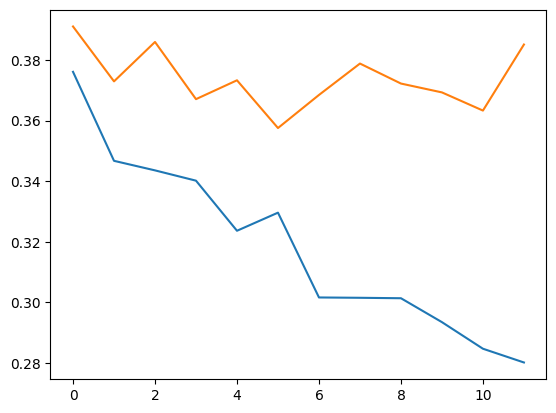

In [15]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [16]:
model.save("face_detection_new.h5")
model.save("face_detection_new.model")

/home/dmns/anaconda3/envs/new/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: face_detection_new.model/assets


INFO:tensorflow:Assets written to: face_detection_new.model/assets


In [17]:
print(model.evaluate(test_data,test_target))

46/46 [==============================] - 10s 219ms/step - loss: 0.3851 - accuracy: 0.8630
[0.38513338565826416, 0.8630419969558716]
